In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


data = pd.read_csv('data/spam/spam.csv', encoding='latin-1')

X = CountVectorizer(stop_words = 'english').fit_transform(data["v2"])
y = data["v1"].map({"ham": 0, "spam": 1}).values

<Axes: xlabel='Word'>

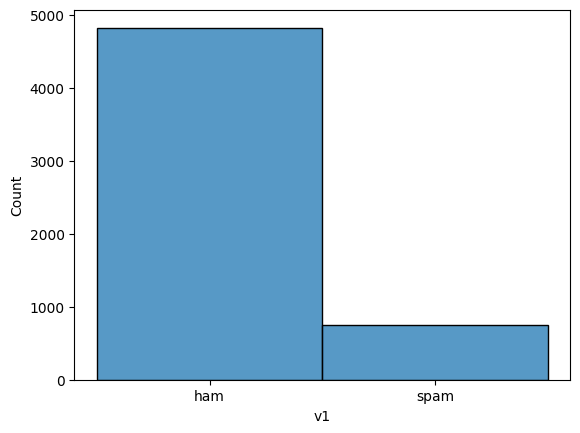

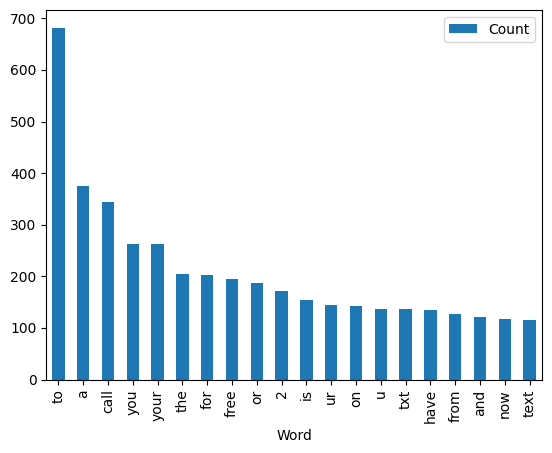

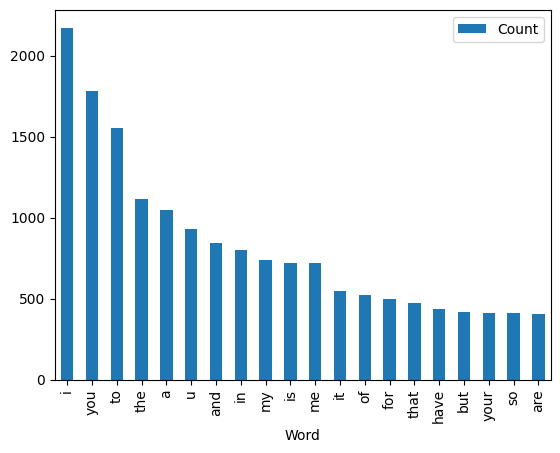

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns


spam_word_df = data.loc[data["v1"]=="spam", "v2"] \
    .str.lower() \
    .str.replace(',','') \
    .str.replace('.', '') \
    .str.split(expand=True) \
    .stack().value_counts() \
    .reset_index() \
    .rename(columns={'index': 'Word', 'count': 'Count'}) \
    .sort_values(by="Count", ascending=False)

ham_word_df = data.loc[data["v1"]=="ham", "v2"] \
    .str.lower() \
    .str.replace(',','') \
    .str.replace('.', '') \
    .str.split(expand=True) \
    .stack().value_counts() \
    .reset_index() \
    .rename(columns={'index': 'Word', 'count': 'Count'}) \
    .sort_values(by="Count", ascending=False)

sns.histplot(data=data, x="v1")
spam_word_df.iloc[0:20, :].plot.bar(x="Word")
ham_word_df.iloc[0:20, :].plot.bar(x="Word")

In [4]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

param_grid = [
  {"alpha": np.logspace(-5, 2, 71)},
]

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.4)

nb_clf_ = GridSearchCV(MultinomialNB(), param_grid, cv=10, verbose=2, scoring="precision")
nb_clf_.fit(X_train, y_train)

nb_clf = nb_clf_.best_estimator_
params = nb_clf_.best_params_

print("Parameters:", params)

y_pred = nb_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Fitting 10 folds for each of 71 candidates, totalling 710 fits
[CV] END ........................................alpha=1e-05; total time=   0.2s
[CV] END ........................................alpha=1e-05; total time=   0.3s
[CV] END ........................................alpha=1e-05; total time=   0.3s
[CV] END ........................................alpha=1e-05; total time=   0.3s
[CV] END ........................................alpha=1e-05; total time=   0.3s
[CV] END ........................................alpha=1e-05; total time=   0.3s
[CV] END ........................................alpha=1e-05; total time=   0.3s
[CV] END ........................................alpha=1e-05; total time=   0.3s
[CV] END ........................................alpha=1e-05; total time=   0.3s
[CV] END ........................................alpha=1e-05; total time=   0.3s
[CV] END .......................alpha=1.2589254117941661e-05; total time=   0.3s
[CV] END .......................alpha=1.258925